In [15]:
#add dependencies
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st 

#create variable to hold path for csv file
hac = "Resources/HappinessAlcoholConsumption.csv"
whr = "Resources/world-happiness-report-2021.csv"

#read csv file and store in pd frame
hac_read = pd.read_csv(hac)
# hac_read.head()
whr_read = pd.read_csv(whr)
# whr_read.head()

In [2]:
# rename country column
renamed_hac = hac_read.rename(columns={"Country":"Country name"})
renamed_hac.head()

,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [3]:
# Merge data frames
merge_df = pd.merge(renamed_hac, whr_read, on="Country name", how="inner")
merge_df.head()

,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Regional indicator,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,Western Europe,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,Western Europe,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,Western Europe,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,Western Europe,...,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,Western Europe,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [4]:
# clean data frames for analysis
clean_data = merge_df[["Country name", "Region", "HappinessScore", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita", "Explained by: Log GDP per capita", "Perceptions of corruption", "Explained by: Social support", "Explained by: Freedom to make life choices"]]
clean_data.head()                       

,Country name,Region,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Explained by: Log GDP per capita,Perceptions of corruption,Explained by: Social support,Explained by: Freedom to make life choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [5]:
# rename cloumns
group_df = clean_data.rename(columns={"Country name":"Country", 
                                   "HappinessScore":"Happiness Score", 
                                   "Beer_PerCapita": "Beer (Per Capita)", 
                                   "Spirit_PerCapita": "Spirit (Per Capita)",
                                   "Wine_PerCapita": "Wine (Per Capita)",
                                   "Explained by: Log GDP per capita": "GDP (Per Capita)",
                                   "Perceptions of corruption": "Perceptions of Corruption",
                                   "Explained by: Social support": "Social Support",
                                   "Explained by: Freedom to make life choices": "Life Choices"})
group_df.head()

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [6]:
group_df.dtypes

Country                       object
Region                        object
Happiness Score              float64
Beer (Per Capita)              int64
Spirit (Per Capita)            int64
Wine (Per Capita)              int64
GDP (Per Capita)             float64
Perceptions of Corruption    float64
Social Support               float64
Life Choices                 float64
dtype: object

In [7]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    111 non-null    object 
 1   Region                     111 non-null    object 
 2   Happiness Score            111 non-null    float64
 3   Beer (Per Capita)          111 non-null    int64  
 4   Spirit (Per Capita)        111 non-null    int64  
 5   Wine (Per Capita)          111 non-null    int64  
 6   GDP (Per Capita)           111 non-null    float64
 7   Perceptions of Corruption  111 non-null    float64
 8   Social Support             111 non-null    float64
 9   Life Choices               111 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 9.5+ KB


In [11]:
group_df.describe()

,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,5.575901,139.405405,97.702703,70.801802,1.042748,0.723297,0.837730,0.516207
std,1.138702,105.705455,79.714672,90.901827,0.388376,0.190145,0.249245,0.128776
min,3.303000,1.000000,1.000000,1.000000,0.113000,0.082000,0.058000,0.175000
25%,4.645000,42.000000,28.000000,4.000000,0.843500,0.658000,0.696000,0.435500
50%,5.546000,127.000000,87.000000,18.000000,1.099000,0.799000,0.899000,0.536000
75%,6.516500,227.500000,140.000000,123.500000,1.372500,0.847500,1.043000,0.619500
max,7.526000,376.000000,373.000000,370.000000,1.751000,0.939000,1.172000,0.716000


In [12]:
# export df as csv file
group_df.to_csv("Resources/group_df.csv", index=False, header=True) 

In [13]:
#sorting based on happiness index
happiness_sort_df = group_df.sort_values("Happiness Score", ascending = False)
happiness_sort_df.head()

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


AttributeError: module 'scipy.stats' has no attribute 'pearson'

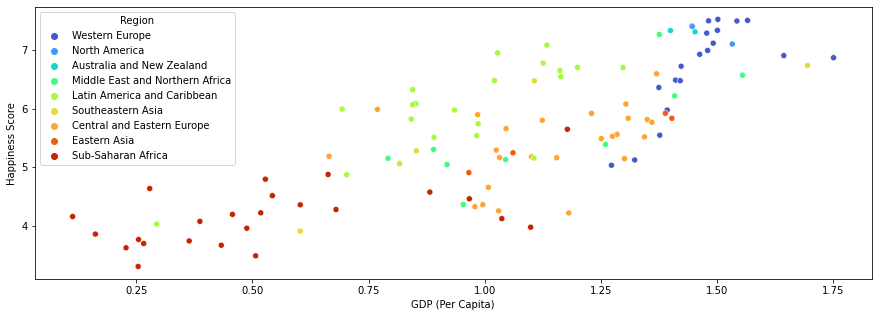

In [16]:
#scatter plot of gdp and happiness for all countries

#set up scatterplot
plt.figure(figsize = (15,5))
sns.scatterplot(data = happiness_sort_df, x = "GDP (Per Capita)", y = "Happiness Score", palette = "turbo", hue = "Region")
#calc regression
x_values = happiness_sort_df["GDP (Per Capita)"]
y_values = happiness_sort_df["Happiness Score"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
corr=st.pearson(x_values, y_values)[0]
print(f"the correlation is {corr:.2f}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=5,color="red")
print(f"The r-squared is: {rvalue**2}")

#clean up scatter plot for looks
plt.title("Happiness Score and GDP (Per Capita) for all Countries", fontsize = 20)
plt.xlabel("Happiness Score", fontsize = 15)
plt.ylabel("GDP Per Capita", fontsize = 15)

plt.savefig("Figures/all_happy_gdp_scatter.png")
plt.show()

In [106]:
# top 10 data frame
top_df = happiness_sort_df.nlargest(10, "Happiness Score")
top_df

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691
5,Canada,North America,7.404,240,122,100,1.447,0.415,1.044,0.648
6,Netherlands,Western Europe,7.339,251,88,190,1.501,0.338,1.079,0.647
7,New Zealand,Australia and New Zealand,7.334,203,79,175,1.400,0.242,1.094,0.665
8,Australia,Australia and New Zealand,7.313,261,72,212,1.453,0.442,1.076,0.647
9,Sweden,Western Europe,7.291,152,60,186,1.478,0.237,1.062,0.685


In [107]:
# Bottom 10 data frame
bottom_df = happiness_sort_df.nsmallest(10, "Happiness Score")
sort_bottom_df = bottom_df.sort_values("Happiness Score", ascending = False)
sort_bottom_df

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
101,Comoros,Sub-Saharan Africa,3.956,1,3,1,0.488,0.781,0.367,0.202
102,Cambodia,Southeastern Asia,3.907,57,65,1,0.603,0.843,0.680,0.702
103,Niger,Sub-Saharan Africa,3.856,3,2,1,0.162,0.693,0.402,0.516
104,Chad,Sub-Saharan Africa,3.763,15,1,1,0.255,0.807,0.353,0.240
105,Burkina Faso,Sub-Saharan Africa,3.739,25,7,7,0.364,0.748,0.472,0.381
106,Madagascar,Sub-Saharan Africa,3.695,26,15,4,0.266,0.803,0.503,0.207
107,Tanzania,Sub-Saharan Africa,3.666,36,6,1,0.433,0.577,0.540,0.549
108,Liberia,Sub-Saharan Africa,3.622,19,152,2,0.228,0.850,0.580,0.430
109,Benin,Sub-Saharan Africa,3.484,34,4,13,0.507,0.661,0.058,0.457
110,Togo,Sub-Saharan Africa,3.303,36,2,19,0.254,0.772,0.239,0.289


In [108]:
top_bottom_df = pd.merge(top_df, sort_bottom_df, how = "outer")
top_bottom_df

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691
5,Canada,North America,7.404,240,122,100,1.447,0.415,1.044,0.648
6,Netherlands,Western Europe,7.339,251,88,190,1.501,0.338,1.079,0.647
7,New Zealand,Australia and New Zealand,7.334,203,79,175,1.400,0.242,1.094,0.665
8,Australia,Australia and New Zealand,7.313,261,72,212,1.453,0.442,1.076,0.647
9,Sweden,Western Europe,7.291,152,60,186,1.478,0.237,1.062,0.685


In [109]:
multi_plot_df = top_bottom_df[["Country", "Happiness Score", "Beer (Per Capita)", "Spirit (Per Capita)", "Wine (Per Capita)"]]
multi_plot_df

,Country,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita)
0,Denmark,7.526,224,81,278
1,Switzerland,7.509,185,100,280
2,Iceland,7.501,233,61,78
3,Norway,7.498,169,71,129
4,Finland,7.413,263,133,97
5,Canada,7.404,240,122,100
6,Netherlands,7.339,251,88,190
7,New Zealand,7.334,203,79,175
8,Australia,7.313,261,72,212
9,Sweden,7.291,152,60,186


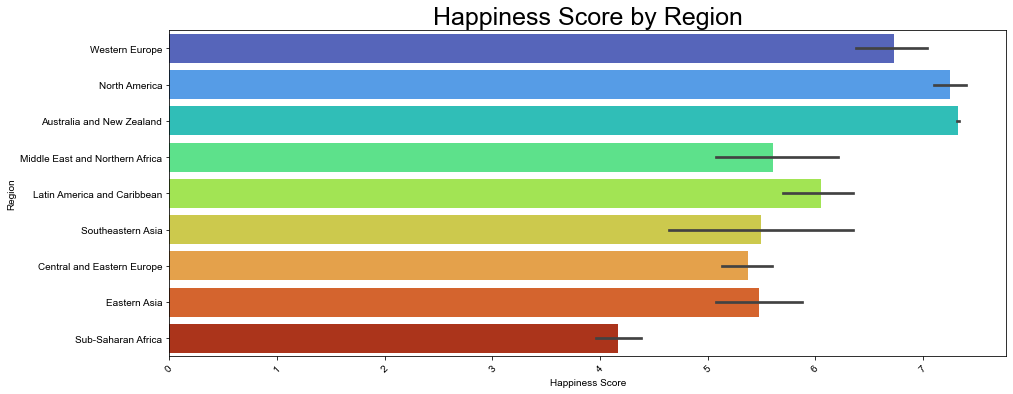

In [16]:
plt.figure(figsize = (15,6))
sns.barplot(x ='Happiness Score',y= 'Region',data = group_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.title('Happiness Score by Region', fontsize = 25)
plt.xticks(rotation = 45)
plt.savefig("Figures/Happiness_Score_by_Region.png")
plt.show()

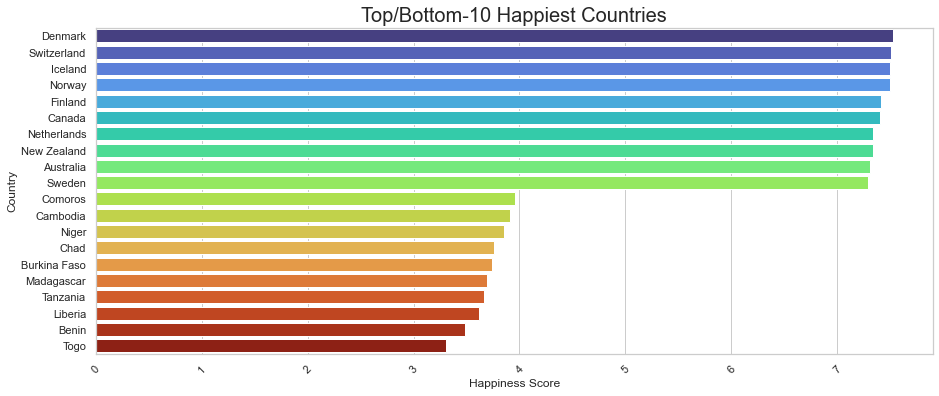

In [17]:
# line plot of countries and thier drinking ber per capita
plt.figure(figsize = (15,6))
sns.barplot(x ="Happiness Score", y= 'Country', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.title("Top/Bottom-10 Happiest Countries", fontsize = 20)
plt.xticks(rotation = 45)
plt.savefig("Figures/Top_Bottom_10_Happy_Countries.png")
plt.show()

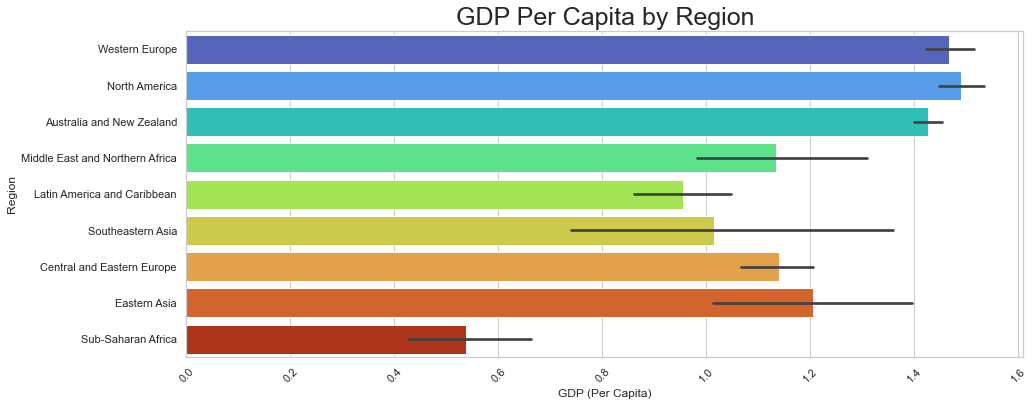

In [18]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'GDP (Per Capita)',y= 'Region', data = group_df, palette = 'turbo')
plt.title('GDP Per Capita by Region', fontsize = 25)
plt.xticks(rotation = 45)
plt.savefig("Figures/GDP_Per_Capita_by_Region.png")
plt.show()

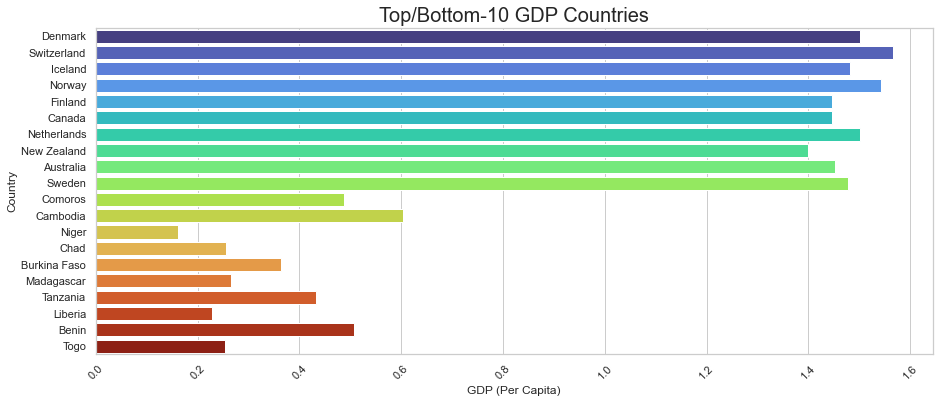

In [19]:
# line plot of countries and thier drinking ber per capita
plt.figure(figsize = (15,6))
sns.barplot(x ="GDP (Per Capita)", y= 'Country', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.title("Top/Bottom-10 GDP Countries", fontsize = 20)
plt.xticks(rotation = 45)
plt.savefig("Figures/Top_Bottom_10_GDP_Countries.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

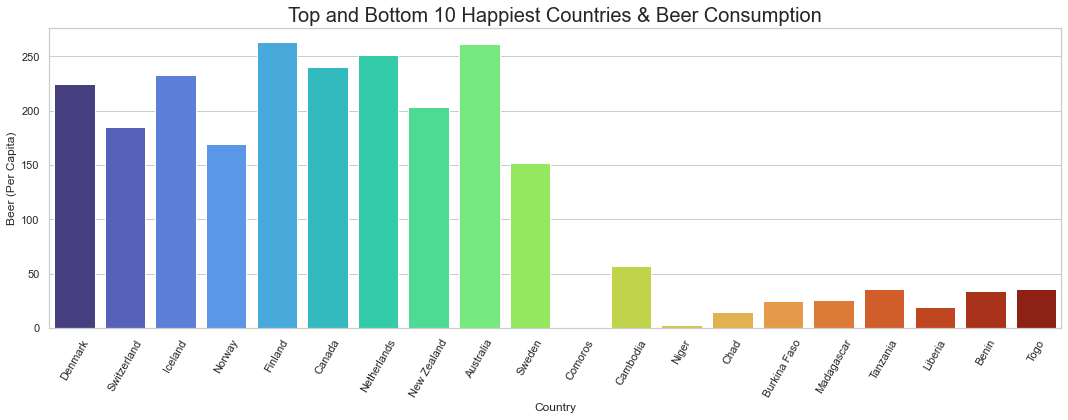

<Figure size 1080x360 with 0 Axes>

In [20]:
plt.figure(figsize = (15,6))
plt.bar(top_bottom_df["Country"], top_bottom_df["Beer (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Beer Consumption", fontsize = 20)
sns.barplot(x ='Country', y= 'Beer (Per Capita)', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.xticks(rotation = 60)
plt.tight_layout()
plt.figure(figsize = (15,5))


plt.savefig("Figures/top_andBottom_ten_beer.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

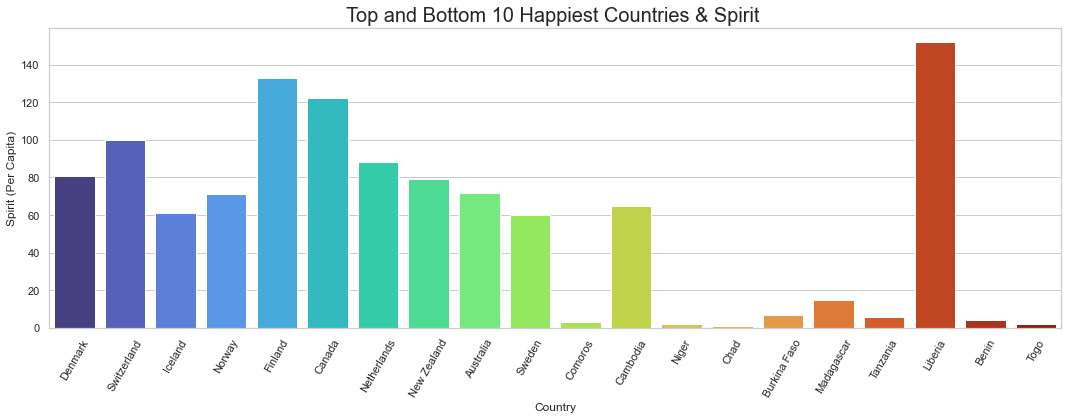

<Figure size 1080x360 with 0 Axes>

In [21]:
plt.figure(figsize = (15,6))
plt.bar(top_bottom_df["Country"], top_bottom_df["Spirit (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Spirit ", fontsize = 20)
sns.barplot(x ='Country', y= 'Spirit (Per Capita)', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.xticks(rotation = 60)
plt.ylabel("Spirit (Per Capita)")
plt.tight_layout()
plt.figure(figsize = (15,5))


plt.savefig("Figures/top_andBottom_ten_spirit.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

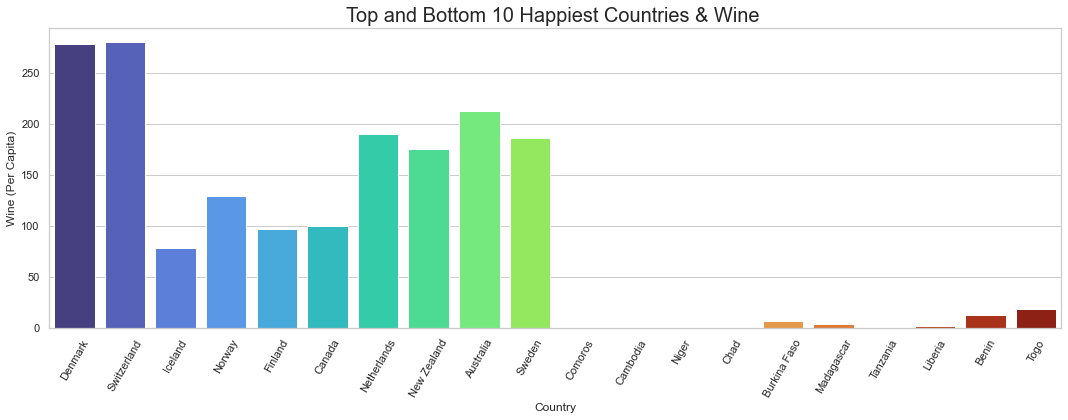

<Figure size 1080x360 with 0 Axes>

In [22]:
plt.figure(figsize = (15,6))
plt.bar(top_bottom_df["Country"], top_bottom_df["Wine (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Wine ", fontsize = 20)
sns.barplot(x ='Country', y= 'Wine (Per Capita)', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.xticks(rotation = 60)
plt.ylabel("Wine (Per Capita)")
plt.tight_layout()
plt.figure(figsize = (15,5))


plt.savefig("Figures/top_andBottom_ten_wine.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

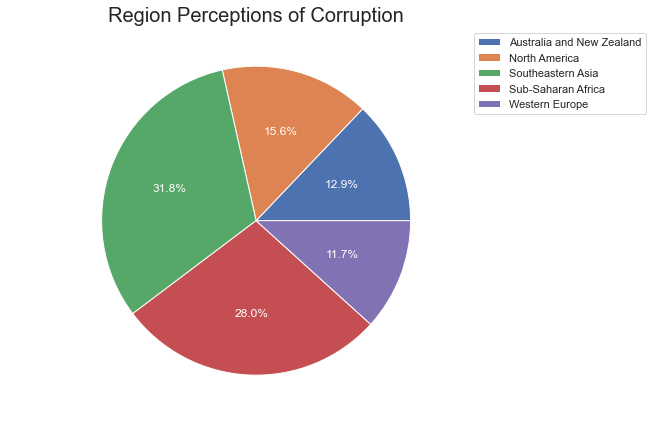

In [23]:

top_bottom_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Perceptions of Corruption",  autopct='%1.1f%%',figsize=(9,9), textprops={'color':"w"})
plt.ylabel("")
plt.title("Region Perceptions of Corruption", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.savefig("Figures/percofcorruption.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

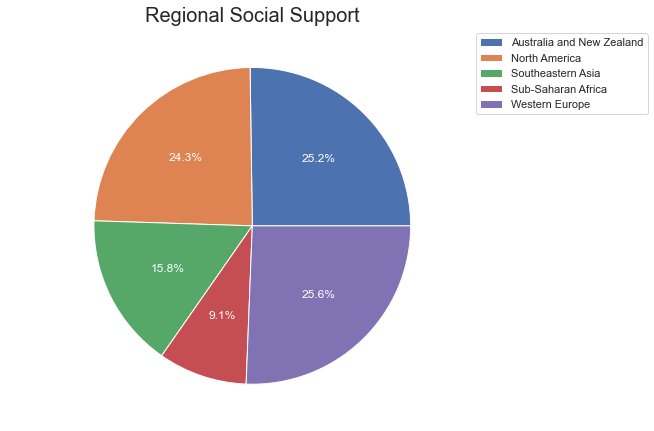

In [24]:
#avg of social support
top_bottom_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Social Support",  autopct='%1.1f%%',figsize=(9,9), textprops={'color':"w"})
plt.ylabel("")
plt.title("Regional Social Support", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.savefig("Figures/Social_Support.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

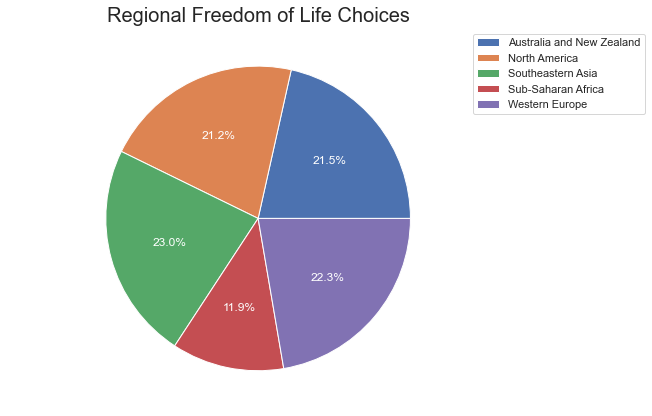

In [25]:
top_bottom_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Life Choices", autopct='%1.1f%%',figsize=(9,9), textprops={'color':"w"})
plt.ylabel("")
plt.title("Regional Freedom of Life Choices", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.savefig("Figures/Freedomof_life _choices.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

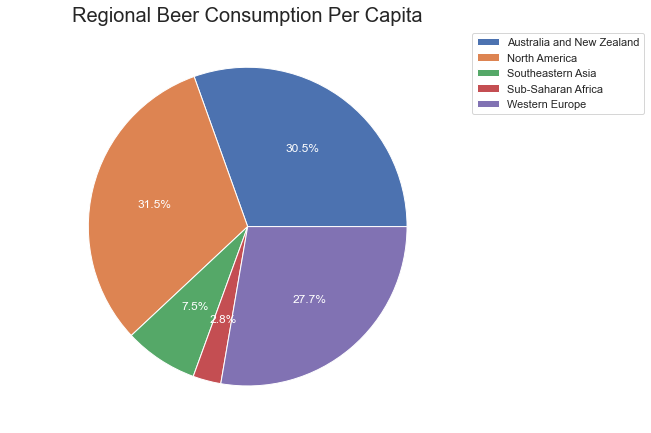

In [26]:
top_bottom_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Beer (Per Capita)",  autopct='%1.1f%%',figsize=(9,9), textprops={'color':"w"})
plt.ylabel("")
plt.title("Regional Beer Consumption Per Capita", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.savefig("Figures/region Beer consumption.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

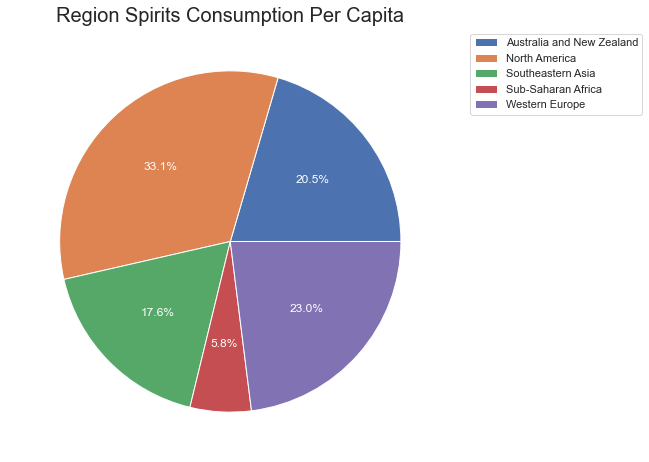

In [27]:
top_bottom_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Spirit (Per Capita)", autopct='%1.1f%%',figsize=(9,9), textprops={'color':"w"})
plt.ylabel("")
plt.title("Region Spirits Consumption Per Capita", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.savefig("Figures/Spiritsregional.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

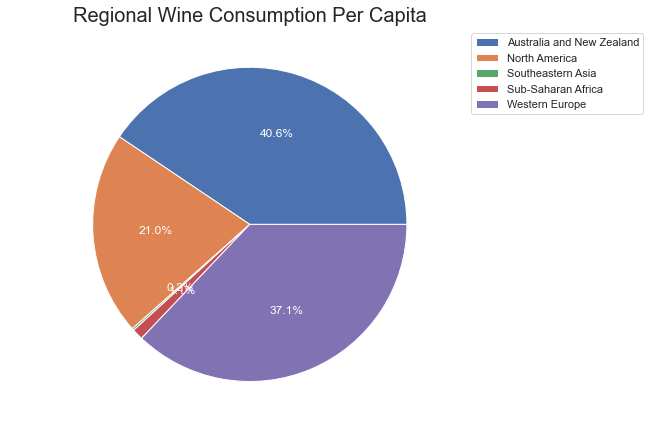

In [28]:
top_bottom_df.groupby(["Region"]).mean().plot(kind = "pie", y = "Wine (Per Capita)",  autopct='%1.1f%%',figsize=(9,9), textprops={'color':"w"})
plt.ylabel("")
plt.title("Regional Wine Consumption Per Capita", fontsize = 20)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.savefig("Figures/Wineregional.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

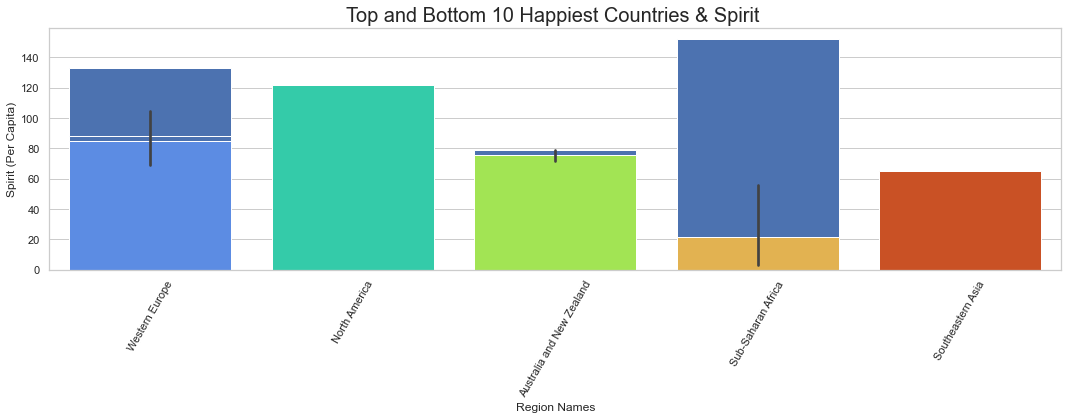

In [110]:
plt.figure(figsize = (15,6))
plt.bar(top_bottom_df["Region"], top_bottom_df["Spirit (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Spirit ", fontsize = 20)
sns.barplot(x ='Region', y= 'Spirit (Per Capita)', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.ylabel("Spirit (Per Capita)")
plt.xlabel("Region Names")
plt.xticks(rotation = 60)
plt.tight_layout()

plt.savefig("Figures/Spiritsregional.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

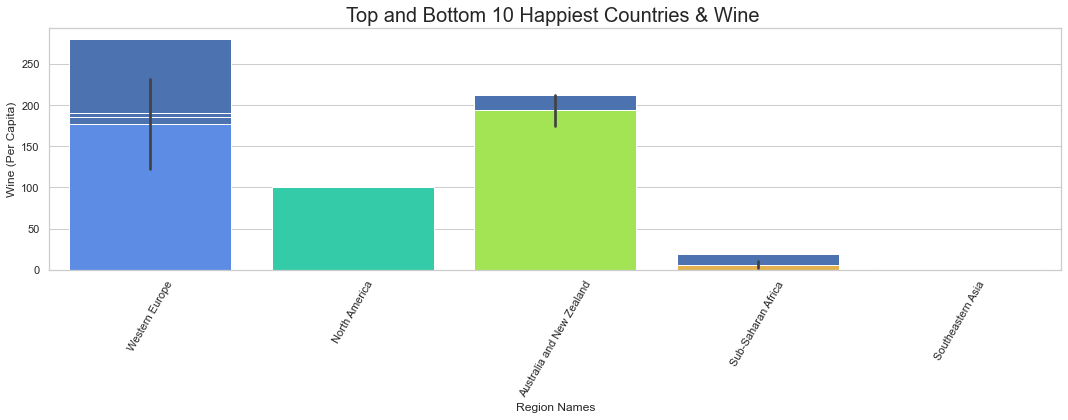

In [111]:
plt.figure(figsize = (15,6))
plt.bar(top_bottom_df["Region"], top_bottom_df["Wine (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Wine ", fontsize = 20)
sns.barplot(x ='Region', y= 'Wine (Per Capita)', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.xlabel("Region Names")
plt.ylabel("Wine (Per Capita)")
plt.xticks(rotation = 60)
plt.tight_layout()

plt.savefig("Figures/Winesregional.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

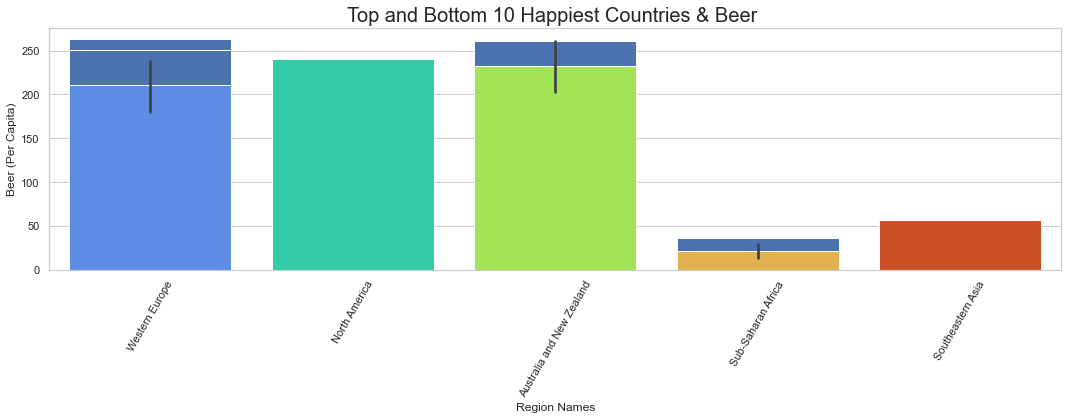

In [112]:
plt.figure(figsize = (15,6))
plt.bar(top_bottom_df["Region"], top_bottom_df["Beer (Per Capita)"])
plt.title("Top and Bottom 10 Happiest Countries & Beer ", fontsize = 20)
sns.barplot(x ='Region', y= 'Beer (Per Capita)', data = top_bottom_df, palette = 'turbo')
sns.set_theme(style="whitegrid")
plt.xlabel("Region Names")
plt.ylabel("Beer (Per Capita)")
plt.xticks(rotation = 60)
plt.tight_layout()

plt.savefig("Figures/Beeregional.png")
plt.show

The r-squared is: 0.7422075421208096


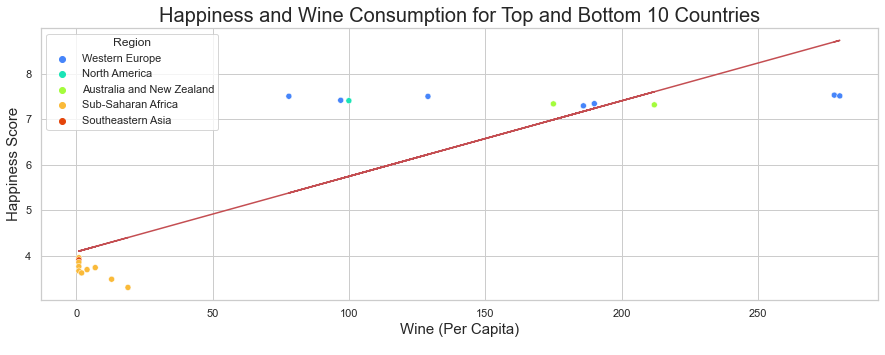

In [32]:
#scatter plot of drink consumption select countries wine
#set up scatterplot
plt.figure(figsize = (15,5))
sns.scatterplot(data = top_bottom_df,  y = "Happiness Score", x = "Wine (Per Capita)", palette = "turbo", hue = "Region")

#calc regression
y_values = top_bottom_df["Happiness Score"]
x_values = top_bottom_df["Wine (Per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=5,color="red")
print(f"The r-squared is: {rvalue**2}")

#clean up scatter plot for looks
plt.title("Happiness and Wine Consumption for Top and Bottom 10 Countries", fontsize = 20)
plt.ylabel("Happiness Score", fontsize = 15)
plt.xlabel("Wine (Per Capita)", fontsize = 15)
plt.legend = "best"

plt.savefig("Figures/top_bottom_happy_wine_scatter.png")
plt.show()

The r-squared is: 0.9071959547683568


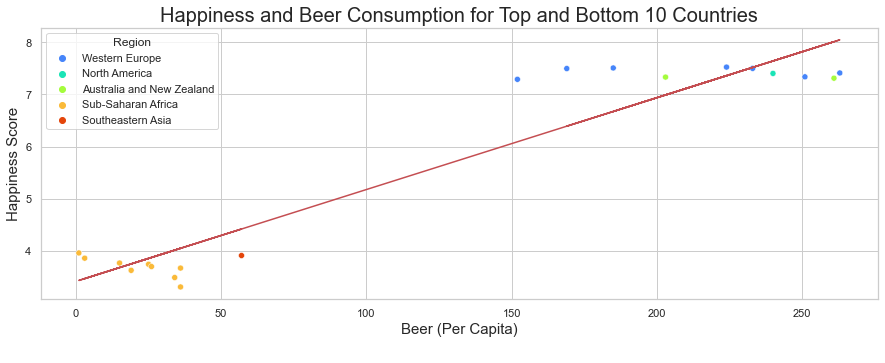

In [33]:
#scatter plot of drink consumption select countries beer
#set up scatterplot
plt.figure(figsize = (15,5))
sns.scatterplot(data = top_bottom_df, y = "Happiness Score", x = "Beer (Per Capita)", palette = "turbo", hue = "Region")

#calc regression
y_values = top_bottom_df["Happiness Score"]
x_values = top_bottom_df["Beer (Per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=5,color="red")
print(f"The r-squared is: {rvalue**2}")

#clean up scatter plot for looks
plt.title("Happiness and Beer Consumption for Top and Bottom 10 Countries", fontsize = 20)
plt.ylabel("Happiness Score", fontsize = 15)
plt.xlabel("Beer (Per Capita)", fontsize = 15)
plt.legend = "best"

plt.savefig("Figures/top_bottom_happy_Beer_scatter.png")
plt.show()

The r-squared is: 0.4117477900193365


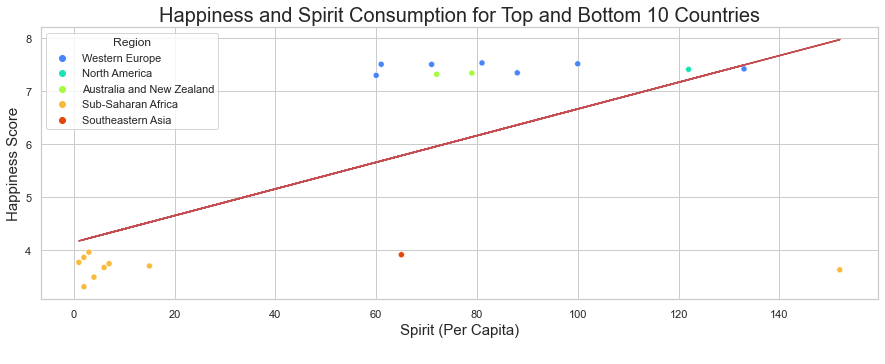

In [34]:
#scatter plot of drink consumption select countries beer
#set up scatterplot
plt.figure(figsize = (15,5))
sns.scatterplot(data = top_bottom_df, y = "Happiness Score", x = "Spirit (Per Capita)", palette = "turbo", hue = "Region")

#calc regression
y_values = top_bottom_df["Happiness Score"]
x_values = top_bottom_df["Spirit (Per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=5,color="red")
print(f"The r-squared is: {rvalue**2}")

#clean up scatter plot for looks
plt.title("Happiness and Spirit Consumption for Top and Bottom 10 Countries", fontsize = 20)
plt.ylabel("Happiness Score", fontsize = 15)
plt.xlabel("Spirit (Per Capita)", fontsize = 15)
plt.legend = "best"

plt.savefig("Figures/top_bottom_happy_Spirit_scatter.png")
plt.show()

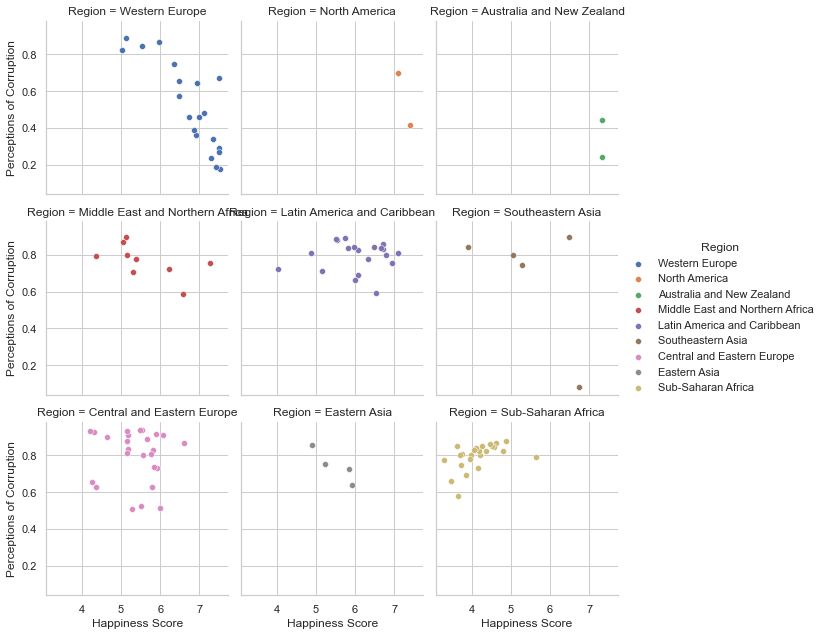

In [35]:
# Facet grid analyzing corruption by region
grid = sns.FacetGrid(happiness_sort_df, col = "Region", hue = "Region", col_wrap=3)
grid.map(sns.scatterplot, "Happiness Score", "Perceptions of Corruption")

grid.add_legend()

plt.savefig("Figures/all_beer_facet.png")
plt.show()

In [36]:
#new df for bar chart group by region and alcohol consumption
region_group = group_df.groupby(["Region"])

wine_region = region_group["Wine (Per Capita)"].mean()
beer_region = region_group["Beer (Per Capita)"].mean()
spirit_region = region_group["Spirit (Per Capita)"].mean()

region_group_all_consumption = pd.DataFrame({"Wine (Per Capita)": wine_region,
                                  "Beer (Per Capita)": beer_region,
                                  "Spirit (Per Capita)": spirit_region})

region_group_all_consumption.reset_index(drop = True)
region_group_all_consumption

,Wine (Per Capita),Beer (Per Capita),Spirit (Per Capita)
Region,,,
Australia and New Zealand,193.500000,232.000000,75.500
Central and Eastern Europe,84.160000,169.560000,171.400
Eastern Asia,10.250000,93.250000,149.750
Latin America and Caribbean,40.050000,154.000000,104.000
Middle East and Northern Africa,10.111111,29.666667,42.000
North America,92.000000,244.500000,140.000
Southeastern Asia,3.000000,79.600000,104.600
Sub-Saharan Africa,11.666667,76.458333,21.625
Western Europe,197.800000,216.450000,101.500


<function matplotlib.pyplot.show(close=None, block=None)>

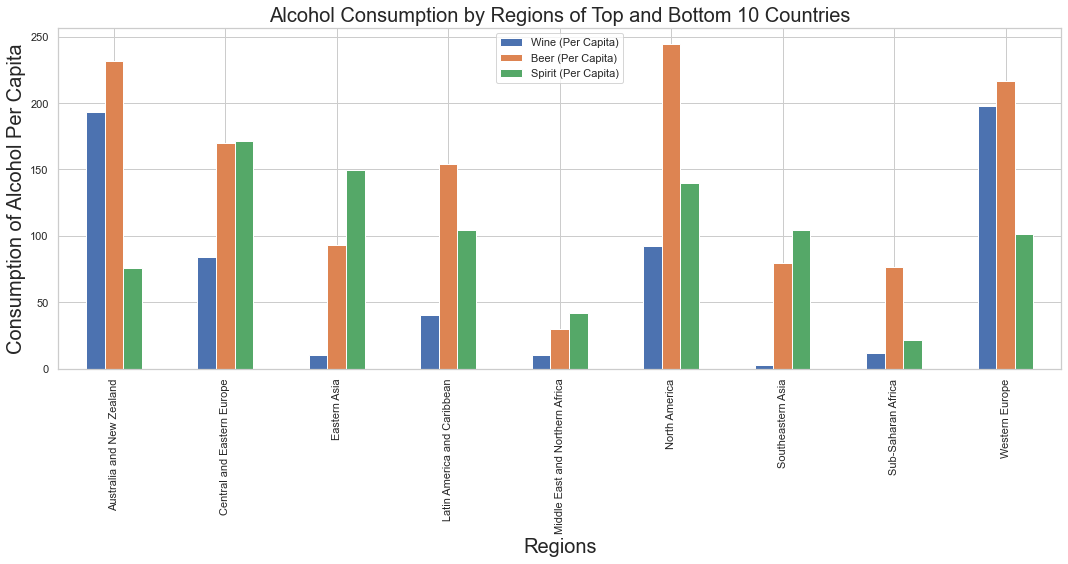

In [37]:
# group bar chart consumption by region
region_all_graph = region_group_all_consumption.plot(kind = "bar", figsize = (15,8))
column_names = region_group_all_consumption["Wine (Per Capita)"], ["Beer (Per Capita)"], ["Spirit (Per Capita)"], ["Happiness Score"]
plt.title("Alcohol Consumption by Regions of Top and Bottom 10 Countries", fontsize = 20)
plt.xlabel("Regions", fontsize = 20)
plt.ylabel("Consumption of Alcohol Per Capita", fontsize = 20)

plt.tight_layout()
plt.savefig("Figures/t_b_10_region_consumption_bar.png")

plt.show

In [38]:
multi_plot_df2 = top_bottom_df[["Country", "Beer (Per Capita)", "Spirit (Per Capita)", "Wine (Per Capita)"]]
multi_plot_df2

,Country,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita)
0,Denmark,224,81,278
1,Switzerland,185,100,280
2,Iceland,233,61,78
3,Norway,169,71,129
4,Finland,263,133,97
5,Canada,240,122,100
6,Netherlands,251,88,190
7,New Zealand,203,79,175
8,Australia,261,72,212
9,Sweden,152,60,186


<function matplotlib.pyplot.show(close=None, block=None)>

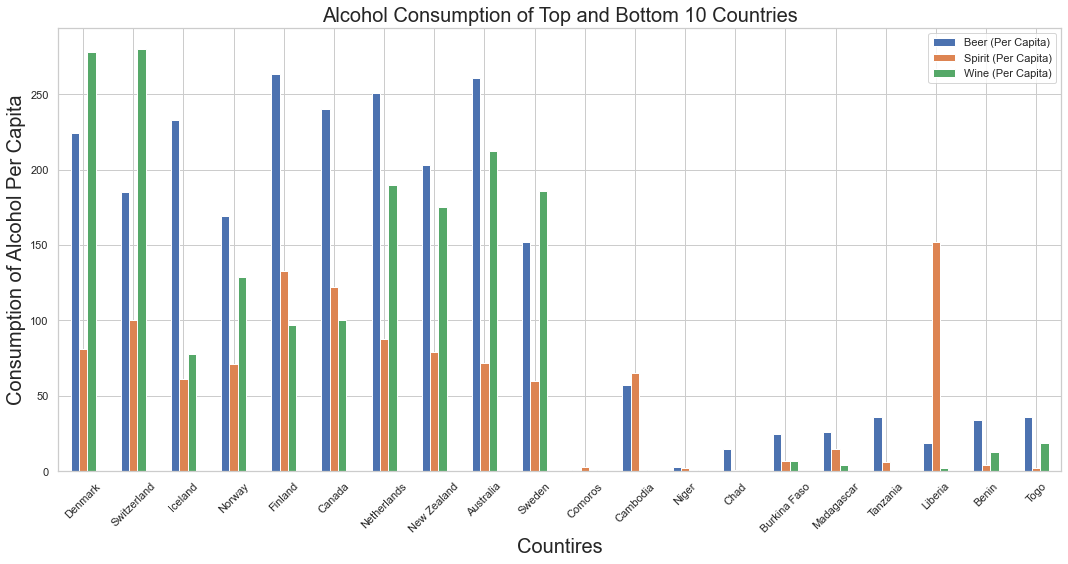

In [39]:
# group bar chart of countries anbd their drinking
multi_plot_graph = multi_plot_df2.plot(kind = "bar", figsize = (15,8))
multi_plot_graph.set_xticklabels(multi_plot_df["Country"], rotation=45)
column_names = multi_plot_df["Beer (Per Capita)"], ["Spirit (Per Capita)"], ["Wine (Per Capita)"]
plt.title("Alcohol Consumption of Top and Bottom 10 Countries", fontsize = 20)
plt.xlabel("Countires", fontsize = 20)
plt.ylabel("Consumption of Alcohol Per Capita", fontsize = 20)

plt.tight_layout()

plt.savefig("Figures/t_b_10_all_bar.png")
plt.show